In [21]:
import pandas as pd
df=pd.read_csv('demand_inventory.csv')
df.head()

,Unnamed: 0,Date,Product_ID,Demand,Inventory
0,0,2023-06-01,P1,51,5500
1,1,2023-06-02,P1,141,5449
2,2,2023-06-03,P1,172,5308
3,3,2023-06-04,P1,91,5136
4,4,2023-06-05,P1,198,5045


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62 non-null     int64 
 1   Date        62 non-null     object
 2   Product_ID  62 non-null     object
 3   Demand      62 non-null     int64 
 4   Inventory   62 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ KB


In [23]:
#DROPPING Unnamed : 0 column
df.drop('Unnamed: 0' ,axis=1,inplace=True)
df.head()

,Date,Product_ID,Demand,Inventory
0,2023-06-01,P1,51,5500
1,2023-06-02,P1,141,5449
2,2023-06-03,P1,172,5308
3,2023-06-04,P1,91,5136
4,2023-06-05,P1,198,5045


In [24]:
#CONVERTING DATE OBJECT TO DATETIME
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        62 non-null     datetime64[ns]
 1   Product_ID  62 non-null     object        
 2   Demand      62 non-null     int64         
 3   Inventory   62 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.1+ KB


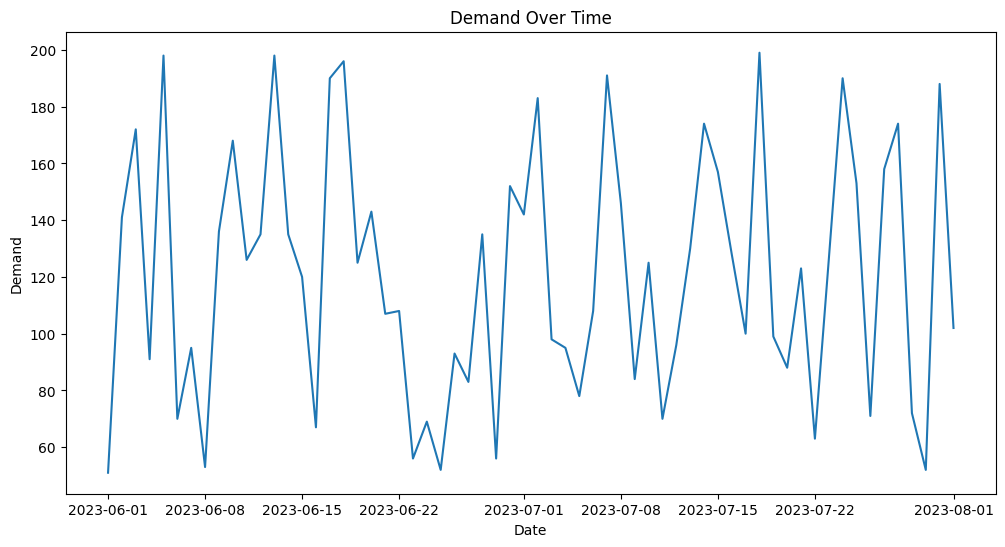

In [25]:
#VISUALIZE DEMAND OVER TIME
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Demand'])
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Over Time')
plt.show()

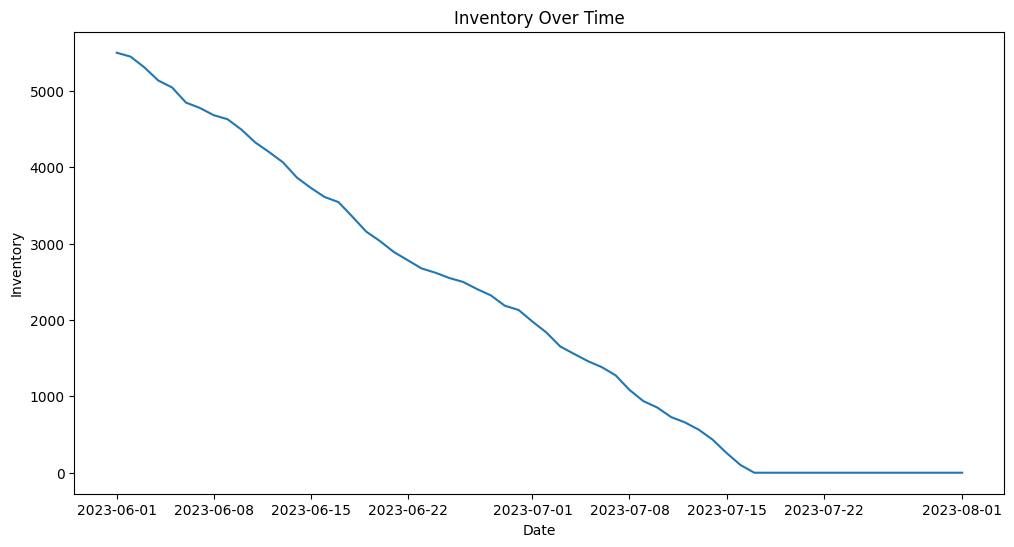

In [26]:
#VISUALIZE INVENTORY OVER TIME
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Inventory'])
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.title('Inventory Over Time')
plt.show()

In [27]:
#Demand shows seasonality.
df.head()
time_series=df['Demand']
time_series.head()

0     51
1    141
2    172
3     91
4    198
Name: Demand, dtype: int64

In [28]:
#CHECKING STATIONARITY
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  result=adfuller(timeseries)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
    if result[1]<=0.05:
      print('The series is stationary')
    else:
      print('The series is not stationary')

In [29]:
diff_series=time_series.diff().dropna()
diff_series.head()
test_stationarity(diff_series)
#d=1

ADF Test Statistic : -7.459949917451149
The series is stationary
p-value : 5.386796879039008e-11
The series is stationary
#Lags Used : 2
The series is stationary
Number of Observations Used : 58
The series is stationary


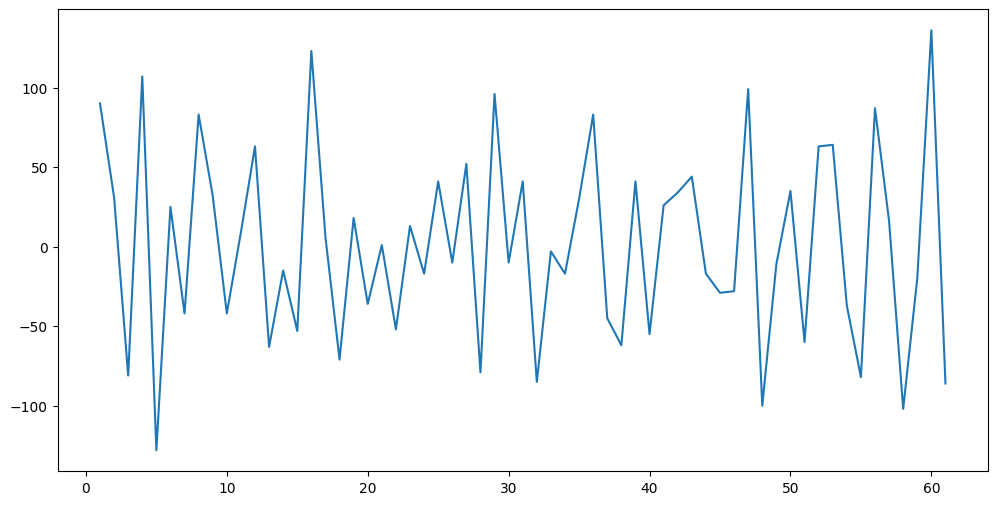

In [30]:
plt.figure(figsize=(12,6))
plt.plot(diff_series) #ALMOST STATIONARY

The chart shows that after first differencing the pattern has become stationary.Hence d=1

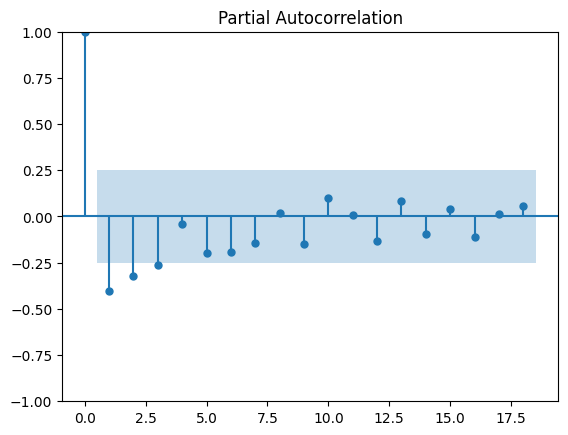

In [31]:
#GETTING PLOT TO FIND p
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff_series)
plt.show() 

AT lag=1,2  the value is out of the range marked in the chart. Hence p=1,2

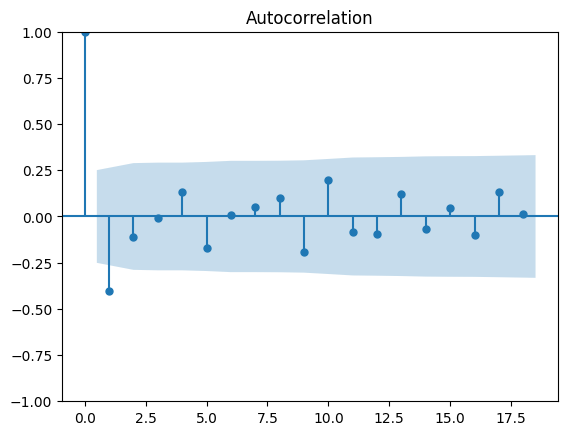

In [32]:
#GETTING ACF PLOT TO FIND q
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_series)
plt.show() #q=1

AT lag=1 the value is out of the range marked in the chart. Hence q=1

In [37]:
#IMPORTING SARMIAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(time_series,order=(1,1,1),seasonal_order=(1,1,1,2))
model_fit=model.fit()

In [ ]:
future_steps = 10
predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
print(type(predictions))
print(predictions)

<class 'pandas.core.series.Series'>
62    117
63    116
64    130
65    114
66    128
67    115
68    129
69    115
70    129
71    115
Name: predicted_mean, dtype: int64


In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df['Date'].iloc[-1] + DateOffset(days=x) for x in range(1, future_steps + 1)]
future_dates


[Timestamp('2023-08-02 00:00:00'),
 Timestamp('2023-08-03 00:00:00'),
 Timestamp('2023-08-04 00:00:00'),
 Timestamp('2023-08-05 00:00:00'),
 Timestamp('2023-08-06 00:00:00'),
 Timestamp('2023-08-07 00:00:00'),
 Timestamp('2023-08-08 00:00:00'),
 Timestamp('2023-08-09 00:00:00'),
 Timestamp('2023-08-10 00:00:00'),
 Timestamp('2023-08-11 00:00:00')]

In [ ]:
future_dates_df=pd.DataFrame(future_dates,columns=['Date'])
future_df=pd.concat([df,future_dates_df])
future_df.reset_index(drop=True,inplace=True)
future_df.tail(15)

,Date,Product_ID,Demand,Inventory
57,2023-07-28,P1,174.0,0.0
58,2023-07-29,P1,72.0,0.0
59,2023-07-30,P1,52.0,0.0
60,2023-07-31,P1,188.0,0.0
61,2023-08-01,P1,102.0,0.0
62,2023-08-02,NaN,NaN,NaN
63,2023-08-03,NaN,NaN,NaN
64,2023-08-04,NaN,NaN,NaN
65,2023-08-05,NaN,NaN,NaN
66,2023-08-06,NaN,NaN,NaN


In [ ]:
future_df['Predictions']=model_fit.predict(start=len(df),end=len(df)+future_steps-1)
future_df

,Date,Product_ID,Demand,Inventory,Predictions
0,2023-06-01,P1,51.0,5500.0,NaN
1,2023-06-02,P1,141.0,5449.0,NaN
2,2023-06-03,P1,172.0,5308.0,NaN
3,2023-06-04,P1,91.0,5136.0,NaN
4,2023-06-05,P1,198.0,5045.0,NaN
...,...,...,...,...,...
67,2023-08-07,NaN,NaN,NaN,115.346712
68,2023-08-08,NaN,NaN,NaN,129.351665
69,2023-08-09,NaN,NaN,NaN,115.387843
70,2023-08-10,NaN,NaN,NaN,129.390111


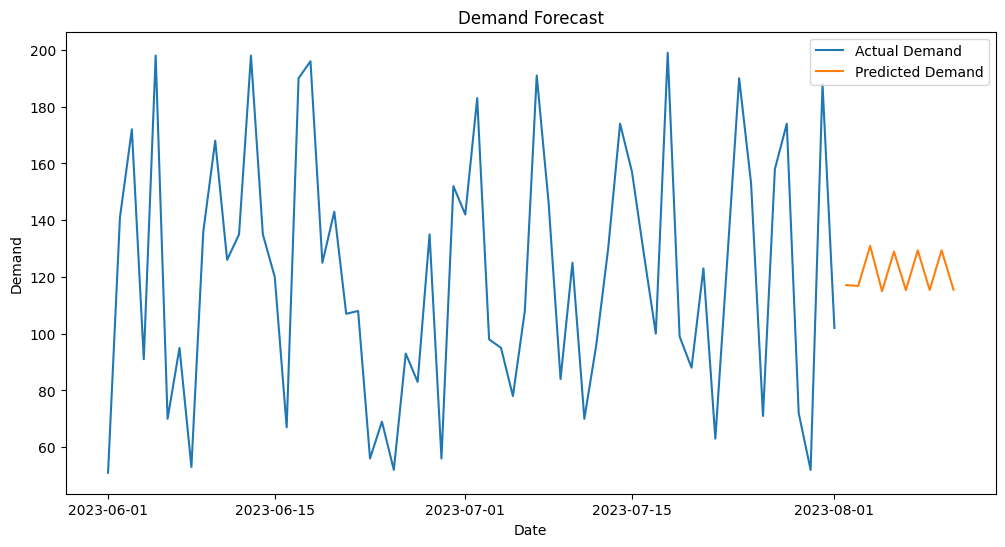

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Demand'], label='Actual Demand')
plt.plot(future_df['Date'], future_df['Predictions'], label='Predicted Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand Forecast')
plt.legend()